**EN3150 Assignment 03: Simple convolutional neural network
to perform classification.**

**Group :- PixelMedics**

ABEYGUNATHILAKA T.L. 200003P

MANIMOHAN T. 200377M

PUSHPAKUMARA H.M.R.M. 200488E

TILAKARATHNA U.A. 200664P


**1 CNN for image classification**

In this assignment, you will create a simple image classifier using convolutional neural network (CNN). You have the freedom to use any programming language and toolkit of your choice, but it is recommended to use the Python programming language along with TensorFlow and Keras or PyTorch to construct the convolutional neural network (CNN).

1. Why CNNs preferable for image classification over multilayered perceptrons (MLPs)
or simple feedforward neural networks (NNs)?

2. Set up your environment: Ensure that you have installed all the required software
packages.

3. Prepare your dataset: Download the CIFAR-10 dataset. This dataset contains 60,000
color images in 10 different classes. Documentation of this data set can be found
in CIFAR-10 dataset. You may use listing 1 to load data. Further, apply suitable
feature scaling. Refer this for more information "pytorch normalization".

4. Split the dataset into training, validation, and testing subsets using a ratio of 60%
for training and 20% each for validation and testing sets1
.


In [1]:
# For PyTorch
import torchvision
import torchvision.transforms as transforms

# Define data transformations (optional, but recommended)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

# Load the testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# For Keras
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


Files already downloaded and verified
Files already downloaded and verified


In [2]:
import torch
from torch.utils.data import random_split


# Assuming you have already loaded the CIFAR-10 dataset into train_dataset and test_dataset

# Calculate the sizes for training, validation, and test sets
total_size = len(train_dataset)
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

# Split the dataset
train_set, val_set, test_set = random_split(train_dataset, [train_size, val_size, test_size])

# Create data loaders for training, validation, and testing
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)



5. Build the CNN model: A common CNN design consists of interleaving convolutional
and max-pooling layers, ending with a linear classification layer [1]. This pattern is
illustrated in Figure 1
2
, and it was inspired by Fukushima’s neocognitron [2] and
Hubel and Wiesel’s work on human visual cortex [3]. Yann LeCun’s LeNet model
refined this approach in 1998, popularizing it through backpropagation and SGD [4].
In this example (Figure 1), we exclude normalization layers from the CNN design
because the model is relatively simple and not very deep. Here, the benefits of
normalization layers may not be visible. However, in deep neural networks, normalization layers, such as batch normalization or layer normalization, are often used to
improve training stability. They help mitigate issues like vanishing gradients and
can make it easier for deep networks to converge during training. Refer tensorflow
batch normalization and pytorch batch normalization for more information.


A basic CNN architecture is given below. Feel free to modify this network by adding
more layers.

• A Convolutional layer with x1 filters, a m1 × m1 kernel, and ’relu’ activation.

• A MaxPooling layer.

• Another Convolutional layer with x2 filters, a m2 × m2 kernel, and ’relu’ activation.

• Another MaxPooling layer.

• Flatten the output.

• A fully connected layer with x3 units and ’relu’ activation.

• Add dropout with a rate of d to reduce overfitting.

• An output layer with 10 units (for 10 classes) and ’softmax’ activation.

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, x1, m1, x2, m2, x3, d):
        super(SimpleCNN, self).__init__()
        # Convolutional layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=x1, kernel_size=m1, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 2
        self.conv2 = nn.Conv2d(in_channels=x1, out_channels=x2, kernel_size=m2, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(x2 * (32 // 4) * (32 // 4), x3)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=d)

        # Output layer
        self.fc2 = nn.Linear(x3, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.dropout(self.relu3(self.fc1(x)))
        x = self.softmax(self.fc2(x))
        return x

# Instantiate the model
x1, m1, x2, m2, x3, d = 16, 3, 32, 3, 128, 0.5  # You can adjust these hyperparameters
model = SimpleCNN(x1, m1, x2, m2, x3, d)

# Print the model architecture
print(model)

# Print model parameters in a table format
print("\nModel Parameters:")
for name, param in model.named_parameters():
    print(f"{name}\t\t{param.shape}\t\tTotal Parameters: {param.numel()}")

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Model Parameters:
conv1.weight		torch.Size([16, 3, 3, 3])		Total Parameters: 432
conv1.bias		torch.Size([16])		Total Parameters: 16
conv2.weight		torch.Size([32, 16, 3, 3])		Total Parameters: 4608
conv2.bias		torch.Size([32])		Total Parameters: 32
fc1.weight		torch.Size([128, 2048])		Total Parameters: 262144
fc1.bias		torch.Size([128])		Total Parameters: 128

6. Determine the parameters of the above network such as kernel sizes, filter sizes, size
of the fully connected layer and dropout rate.

In [15]:
x1, m1, x2, m2, x3, d = 16, 3, 32, 3, 128, 0.5  # Adjust these hyperparameters
model = SimpleCNN(x1, m1, x2, m2, x3, d)


7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate. Refer this page to see available optimizers keras optimizers and pytorch optimizers. More information about optimizer can be found in
https://cs231n.github.io/neural-networks



Epoch [1/20], Train Loss: 2.1506, Validation Loss: 2.0574
Epoch [2/20], Train Loss: 2.0531, Validation Loss: 1.9917
Epoch [3/20], Train Loss: 2.0109, Validation Loss: 1.9638
Epoch [4/20], Train Loss: 1.9805, Validation Loss: 1.9437
Epoch [5/20], Train Loss: 1.9605, Validation Loss: 1.9351
Epoch [6/20], Train Loss: 1.9427, Validation Loss: 1.9109
Epoch [7/20], Train Loss: 1.9331, Validation Loss: 1.9159
Epoch [8/20], Train Loss: 1.9181, Validation Loss: 1.8958
Epoch [9/20], Train Loss: 1.9079, Validation Loss: 1.8780
Epoch [10/20], Train Loss: 1.8954, Validation Loss: 1.8773
Epoch [11/20], Train Loss: 1.8854, Validation Loss: 1.8726
Epoch [12/20], Train Loss: 1.8714, Validation Loss: 1.8612
Epoch [13/20], Train Loss: 1.8690, Validation Loss: 1.8521
Epoch [14/20], Train Loss: 1.8560, Validation Loss: 1.8544
Epoch [15/20], Train Loss: 1.8524, Validation Loss: 1.8375
Epoch [16/20], Train Loss: 1.8408, Validation Loss: 1.8388
Epoch [17/20], Train Loss: 1.8376, Validation Loss: 1.8478
Epoch 

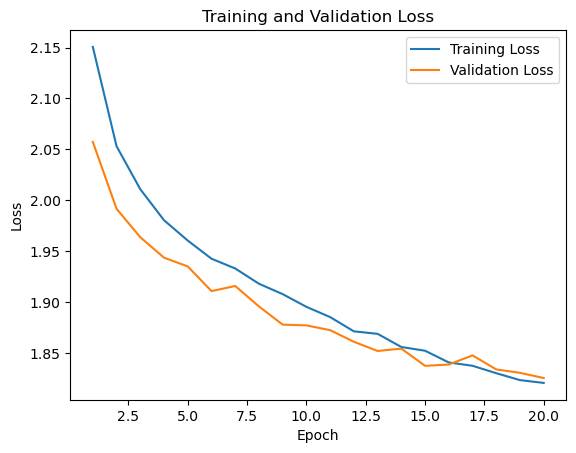

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming you have the train_loader and val_loader already defined

# Instantiate the model
x1, m1, x2, m2, x3, d = 16, 3, 32, 3, 128, 0.5
model = SimpleCNN(x1, m1, x2, m2, x3, d)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust the learning rate as needed

# Training loop
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation loss
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Calculate average validation loss for the epoch
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print progress
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


8. Why we have chosen adam optimizer over SGD?



**Adaptive Learning Rates:**

Adam adjusts learning rates individually for each parameter based on historical gradients.

**Momentum and RMSprop Combined:**

Adam combines momentum and RMSprop techniques, leading to faster convergence and better generalization.

**Effective for Noisy Data and Sparse Gradients:**

Adam handles noisy data and sparse gradients well, making it suitable for real-world, complex datasets.

**No Need for Manual Learning Rate Tuning:**

Adam reduces the need for manual tuning of learning rates, providing robust performance across a range of hyperparameter choices.

**Efficient Memory Usage:**

Adam's use of moving averages for squared gradients results in efficient memory usage, beneficial for large datasets or limited computational resources.

**Well-suited for Deep Learning:**

Adam has demonstrated effectiveness in training deep neural networks, which often have complex architectures and numerous parameters.

9. Why we have chosen sparse categorical crossentropy as the loss function?



- **Single-Label Classification:**
  - Suitable for problems where each instance belongs to only one class.

- **Integer Class Labels:**
  - Designed for scenarios with integer class labels, avoiding the need for one-hot encoding.

- **Efficiency:**
  - Computationally efficient for a large number of classes, reducing the need for explicit one-hot encoding.

- **Memory Efficiency:**
  - Efficient memory usage, particularly important for deep learning models with limited resources.

- **Commonly Used for Classification:**
  - Standard choice for classification tasks, often used with softmax activation in the output layer.

- **Gradient Computation:**
  - Computationally efficient gradient computation, making it suitable for backpropagation in neural network training.

- **Handles Class Imbalance:**
  - Effective in dealing with class imbalance without requiring equal representation of each class.


10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.


Test Accuracy: 62.58%


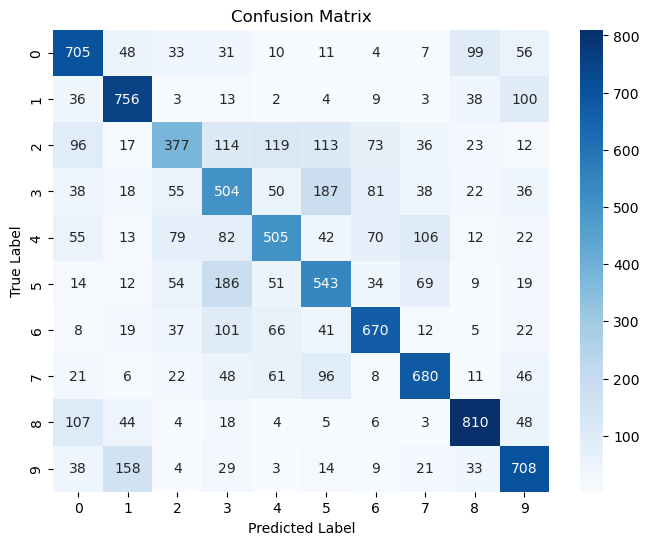

Weighted Precision: 0.6248
Weighted Recall: 0.6258


In [18]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the test_loader and the model already defined

# Set the model to evaluation mode
model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)  # Get the index of the class with the maximum probability
        all_predictions.extend(predictions.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Precision and Recall
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print(f'Weighted Precision: {precision:.4f}')
print(f'Weighted Recall: {recall:.4f}')


11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1.

**2 Compare your network with state-of-the-art networks***

"In practice, training an entire convolutional network from scratch (starting with
random initialization) is a rare occurrence. This is primarily due to the scarcity of
datasets of sufficient size. Instead, a common approach is to first pretrain a CNN
on an extensive dataset, such as ImageNet, which comprises 1.2 million images
across 1000 categories. Subsequently, this pretrained CNN can be utilized as either
an initialization point or a fixed feature extractor when tackling a specific task of
interest. This is known as transfer learning" 3
.

12. Choose two state-of-the-art pre-trained model or architecture like ImageNet, ResNet,
Googlenet, AlexNet, DenseNet and VGG.

13. Load the pre-trained model and fine-tune it for the CIFAR-10 dataset.

14. Train the fine-tuned model using the same training and testing data splits as your
custom CNN model.





15. Record training and validation loss values for each epoch.


In [26]:
import torch
import torchvision
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

# Assuming you have the train_loader and test_loader already defined for CIFAR-10

# Function to load a pre-trained model and modify the classifier for CIFAR-10
def load_and_modify_model(model_name):
    if model_name == 'resnet':
        model = models.resnet18(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, 10)  # Modify the classifier for CIFAR-10
    elif model_name == 'densenet':
        model = models.densenet121(pretrained=True)
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, 10)  # Modify the classifier for CIFAR-10
    else:
        raise ValueError("Invalid model name")
    
    return model

# Function to fine-tune the model
def fine_tune_model(model, train_loader, test_loader, num_epochs=5, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    # Fine-tuning loop
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # Average training loss for the epoch
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        # Average validation loss for the epoch
        avg_val_loss = running_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Choose the models to fine-tune
model_names = ['resnet', 'densenet']

# Fine-tune each model
#resnet
print(f"\nFine-tuning {model_names[0]} for CIFAR-10:")
pre_trained_resnet_model = load_and_modify_model(model_names[0])
train_resnet_losses, val_resnet_losses = fine_tune_model(pre_trained_resnet_model, train_loader, test_loader)

# Print the final training and validation loss values
print(f"\nFinal resnet Training  Loss: {train_resnet_losses[-1]:.4f}")
print(f"Final resnet Validation Loss: {val_resnet_losses[-1]:.4f}")

#densenet
print(f"\nFine-tuning {model_names[1]} for CIFAR-10:")
pre_trained_densenet_model = load_and_modify_model(model_names[1])
train_densenet_losses, val_densenet_losses = fine_tune_model(pre_trained_densenet_model, train_loader, test_loader)

# Print the final training and validation loss values
print(f"\nFinal densenet Training Loss: {train_densenet_losses[-1]:.4f}")
print(f"Final densenet Validation Loss: {val_densenet_losses[-1]:.4f}")


Fine-tuning resnet for CIFAR-10:
Epoch 1/5, Train Loss: 0.9614, Validation Loss: 0.7905
Epoch 2/5, Train Loss: 0.6517, Validation Loss: 0.6352
Epoch 3/5, Train Loss: 0.5209, Validation Loss: 0.6456
Epoch 4/5, Train Loss: 0.4189, Validation Loss: 0.6808
Epoch 5/5, Train Loss: 0.3462, Validation Loss: 0.6137

Final resnet Training  Loss: 0.3462
Final resnet Validation Loss: 0.6137

Fine-tuning densenet for CIFAR-10:


c:\Users\MSI\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Train Loss: 0.8808, Validation Loss: 0.6523
Epoch 2/5, Train Loss: 0.6377, Validation Loss: 0.6135
Epoch 3/5, Train Loss: 0.4895, Validation Loss: 0.5305
Epoch 4/5, Train Loss: 0.3798, Validation Loss: 0.5127
Epoch 5/5, Train Loss: 0.3455, Validation Loss: 0.5049

Final densenet Training Loss: 0.3455
Final densenet Validation Loss: 0.5049


16. Evaluate the fine-tuned model on the testing dataset and calculate the test accuracy

In [28]:
import torch
from sklearn.metrics import accuracy_score

# Function to evaluate a model on the testing dataset
def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)  # Get the index of the class with the maximum probability
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

# Evaluate the fine-tuned models on the testing dataset
resnet_accuracy = evaluate_model(pre_trained_resnet_model, test_loader)
densenet_accuracy = evaluate_model(pre_trained_densenet_model, test_loader)

print(f"Test Accuracy (ResNet): {resnet_accuracy * 100:.2f}%")
print(f"Test Accuracy (Densenet): {densenet_accuracy * 100:.2f}%")


Test Accuracy (ResNet): 80.40%
Test Accuracy (Densenet): 82.65%


17. Compare the test accuracy of your custom CNN model with that of the fine-tuned
state-of-the-art model.



In [29]:

# Assuming you have the 'model' variable containing your custom CNN model

# Evaluate the custom CNN model on the testing dataset
print("\nEvaluation on Custom CNN:")
evaluate_model(model, test_loader)

# Compare with fine-tuned models
print("\nComparison of Test Accuracy:")
print(f"Custom CNN Test Accuracy: {accuracy * 100:.2f}%")
print(f"Fine-Tuned ResNet Test Accuracy: {resnet_accuracy * 100:.2f}%")
print(f"Fine-Tuned DenseNet Test Accuracy: {densenet_accuracy * 100:.2f}%")



Evaluation on Custom CNN:

Comparison of Test Accuracy:
Custom CNN Test Accuracy: 62.58%
Fine-Tuned ResNet Test Accuracy: 80.40%
Fine-Tuned DenseNet Test Accuracy: 82.65%


18. Discuss trade-offs, advantages, and limitations of using a custom model versus a
pre-trained model.